# ALICE Training & Testing
Version II: training \& testing tensorflow >2.

## Training

#### 1) Data import
Google drive import -- optional.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 2) Package installations

ASJ Note: the latest tensorflow version resulted in an _Inference error_ warning which disappears when using tensorflow<2.9.

Update: in this current version, we'll use tensorflow==2.7.

In [ ]:
!pip install -r requirements.txt

#### 3) Imports

In [1]:
import label
import tensorflow as tf
from tensorflow.config import list_physical_devices

#### 4) GPU test

In [4]:
device_name = tf.test.gpu_device_name()
print(device_name)
print("Tensorflow",tf.__version__)
print("Num GPUs Available: ", len(list_physical_devices('GPU')))

/device:GPU:0
Tensorflow 2.7.0
Num GPUs Available:  1


#### 5) Small dataset test

ASJ Note: Small dataset has 10 training images and 10 validation. 

Update no. epochs and states per epoch in _label.py_ for a shorter test, e.g., epochs = 5, states_per_epoch = 10.

In [ ]:
!python3 label.py train --dataset=drive/MyDrive/mini_test --weights=coco

#### 6) Training
ASJ Note: Full dataset has 1180 training images and 528 validation images.

In [ ]:
!python3 label.py train --dataset=drive/MyDrive/ALICE_project --weights=coco

## Testing

#### 7) Imports

In [3]:
import label
import mrcnn.model as modellib
import skimage
import mrcnn.visualize as visualize
import matplotlib.pyplot as plt
%matplotlib inline 

#### 8) Model for Testing

In [4]:
class InferenceConfig(label.labelConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        35
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  1024
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [8]:
weights_path = '/logs/label20230218T1408/mask_rcnn_label_0003.h5'

# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", config=config, model_dir="")

# Load weights trained on ALICE data
model.load_weights(weights_path, by_name=True)

Re-starting from epoch 3


#### 9) Sample Test

In [9]:
pth = '/content/drive/MyDrive/mini_test/val/Drag001_additional_1.jpg'
image = skimage.io.imread(pth)

In [10]:
# ALICE Class names
class_names = ['BG', 'label']

Processing 1 images
image                    shape: (1365, 2048, 3)       min:    2.00000  max:  246.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  130.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 2048.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


/usr/local/lib/python3.8/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


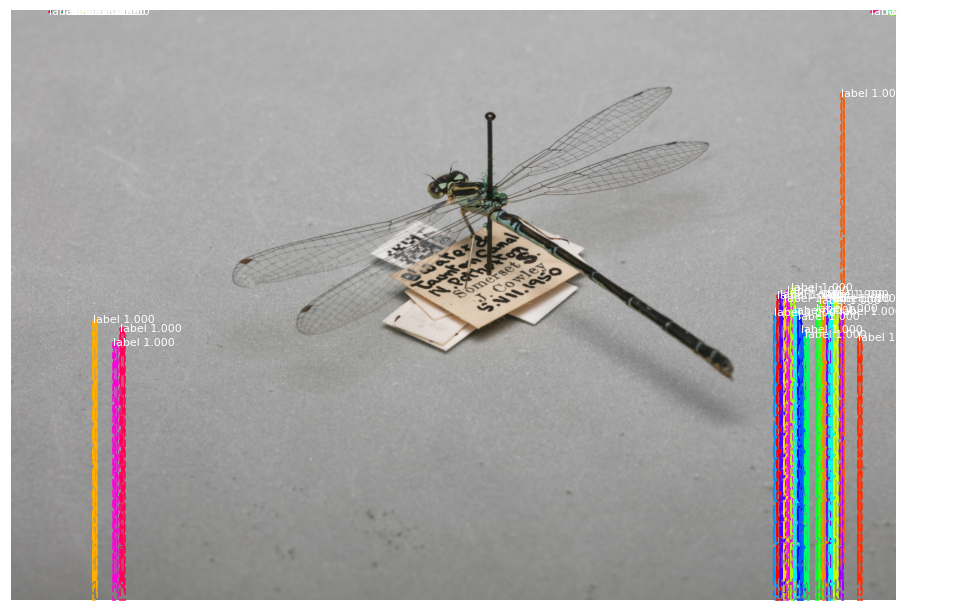

In [11]:
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [13]:
!python3 label.py splash --weights="last" --image="/content/drive/MyDrive/mini_test/val/Drag001_additional_1.jpg"

Weights:  last
Dataset:  None
Logs:  /logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        35
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  1024
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_